In [1]:
!ls

sample_data


In [2]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2020-03-30 16:19:55--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.15.36
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.15.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  85.3MB/s    in 14s     

2020-03-30 16:20:10 (54.2 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [3]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2020-03-30 16:20:11--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.185.187
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.185.187|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  49.4MB/s    in 5m 27s  

2020-03-30 16:25:39 (56.4 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [4]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2020-03-30 16:25:40--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.130.171
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.130.171|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  87.2MB/s    in 2.8s    

2020-03-30 16:25:43 (87.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [5]:
!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip

--2020-03-30 16:25:43--  http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.147.172
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.147.172|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148688564 (1.1G) [application/zip]
Saving to: ‘stuff_annotations_trainval2017.zip’

stuff_annotations_t 100%[===================>]   1.07G  66.6MB/s    in 15s     

2020-03-30 16:25:58 (72.2 MB/s) - ‘stuff_annotations_trainval2017.zip’ saved [1148688564/1148688564]



In [0]:
!unzip val2017.zip

In [0]:
!unzip train2017.zip

In [8]:
!unzip stuff_annotations_trainval2017.zip

Archive:  stuff_annotations_trainval2017.zip
   creating: annotations/
 extracting: annotations/stuff_train2017_pixelmaps.zip  
 extracting: annotations/stuff_val2017_pixelmaps.zip  
  inflating: annotations/stuff_val2017.json  
  inflating: annotations/stuff_train2017.json  
   creating: annotations/deprecated-challenge2017/
  inflating: annotations/deprecated-challenge2017/val-ids.txt  
  inflating: annotations/deprecated-challenge2017/train-ids.txt  


In [9]:
!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [10]:
!ls

annotations		      stuff_annotations_trainval2017.zip  val2017
annotations_trainval2017.zip  train2017				  val2017.zip
sample_data		      train2017.zip


In [0]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dset

In [12]:
training_data = dset.CocoDetection(root = 'train2017', annFile = 'annotations/instances_train2017.json')

loading annotations into memory...
Done (t=15.46s)
creating index...
index created!


In [13]:
validation_data = dset.CocoDetection(root = 'val2017', annFile = 'annotations/instances_val2017.json')

loading annotations into memory...
Done (t=0.54s)
creating index...
index created!


In [14]:
print("Number of training images: ",len(training_data))

Number of training images:  118287


In [15]:
print("Number of validation images: ",len(validation_data))

Number of validation images:  5000


In [0]:
import cv2
import numpy as np

In [19]:
classes = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", 
           "fire hydrant", "street sign", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", 
           "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "hat", "backpack", "umbrella", "shoe", "eye glasses", 
           "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", 
           "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "plate", "wine glass", "cup", 
           "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", 
           "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "mirror", "dining table", "window", "desk", 
           "toilet", "door", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", 
           "blender", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush", "hair brush",]
len(classes)

91

In [0]:
train_image, train_label = training_data[633]

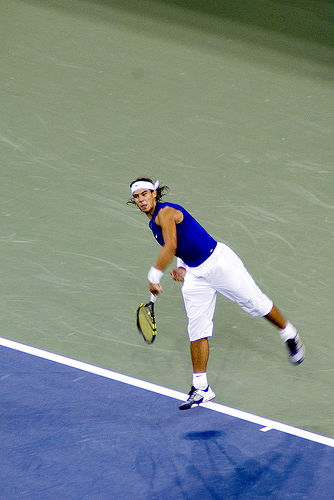

In [108]:
train_image

In [109]:
import matplotlib.pyplot as plt

train_image=np.array(train_image)
print('Image size: (Height, Width, RGB):', train_image.shape)

bbox_counter =0
class_label=[]
bounding_boxes = []
for d in train_label:
  bb = d['bbox']
  cl=d['category_id']
  class_label.append(cl)
  bounding_boxes.append(bb)
  bbox_counter = bbox_counter +1
print("")
print('Num of objects:', bbox_counter)
print('Bounding Boxes (num_boxes, x_min, y_min, x_max, y_max)')
print(bounding_boxes)
print("")
print("Class Labels:")
for i in range(bbox_counter):
  print(class_label[i],":",classes[class_label[i]-1])

print("")
train_label = np.array(train_label)
print("Shape of label: ",train_label.shape)

Image size: (Height, Width, RGB): (500, 334, 3)

Num of objects: 2
Bounding Boxes (num_boxes, x_min, y_min, x_max, y_max)
[[130.35, 177.26, 173.34, 231.13], [136.25, 292.53, 21.09, 52.27]]

Class Labels:
1 : person
43 : tennis racket

Shape of label:  (2,)


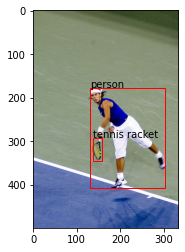

In [110]:
import matplotlib.patches as patches
from PIL import Image
im = np.array((train_image), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots()

# Display the image
ax.imshow(im)
# Create a Rectangle patch
for i in range(bbox_counter):
    rect = patches.Rectangle((bounding_boxes[i][0],bounding_boxes[i][1]),bounding_boxes[i][2],bounding_boxes[i][3],linewidth=1,edgecolor='r',facecolor='none',)
    plt.text(bounding_boxes[i][0],bounding_boxes[i][1],classes[class_label[i]-1])
# Add the patch to the Axes
    ax.add_patch(rect)

plt.show()